In [2]:
#Running the provided code from autoencoder.py
from google.colab import drive
drive.mount('/content/gdrive')
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Mounted at /content/gdrive
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.6964 - val_loss: 0.6961
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6960 - val_loss: 0.6957
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6956 - val_loss: 0.6954
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6953 - val_loss: 0.6950
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.6950 - val_loss: 0.6947


Executed the given code.

In [3]:
#1.Added one more hidden layer to autoencoder

from keras.layers import Input, Dense
from keras.models import Model

# This is the size of our encoded representation
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded1 = Dense(128, activation='relu')(input_img)
encoded2 = Dense(encoding_dim, activation='relu')(encoded1)

# "decoded" is the lossy reconstruction of the input
decoded1 = Dense(128, activation='relu')(encoded2)
decoded2 = Dense(784, activation='sigmoid')(decoded1)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded2)

# This model maps an input to its encoded representation
encoder = Model(input_img, encoded2)

# This is our decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer2(decoder_layer1(encoded_input)))

# Compile the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load the MNIST dataset
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.6947 - val_loss: 0.6946
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.6945 - val_loss: 0.6944
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.6943 - val_loss: 0.6943
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.6943 - val_loss: 0.6942


1. Used the Input function to specify a placeholder for the input image (with 784 features).
2. Created a dense layer with 128 units and ReLU activation. (Encoded layer)
3. Added another dense layer with 32 units and ReLU activation. (Encoded layer)
4. Added the decoded layer, this layer is similar to the first encoding layer and has 128 units with ReLU activation.
5. Added another decoded layer,this is similar to the input with 784 units but used a sigmoid activation function to produce outputs between 0 and 1.
6. Created the encoded and decoded model.
7. Compiled the autoencoder using the "Adadelta" optimizer and binary crossentropy as the loss function.
8. Loaded MNIST dataset and flattened the image.
9. Trained the autoencoder using fit() function.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


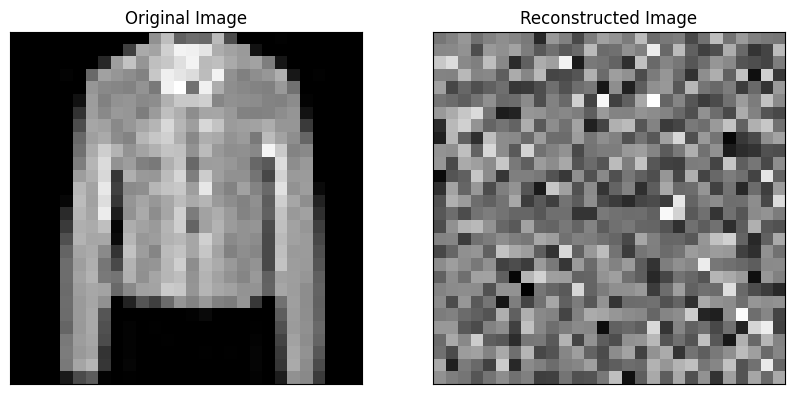

In [4]:
#2.Do the prediction on the test data and then visualize one of the reconstructed version of that test data.
#Also, visualize the same test data before reconstruction using Matplotlib


import matplotlib.pyplot as plt

# Get the reconstructed images for the test set
reconstructed_imgs = autoencoder.predict(x_test)

# Choose a random image from the test set
n = 10  # index of the image to be plotted
plt.figure(figsize=(10, 5))

# Plot the original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Original Image")

# Plot the reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(reconstructed_imgs[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()

1. Used the trained autoencoder model to predict the reconstructed images from the test set.


2. Selected an index as 10  from the test data to visualize a specific image.


3. Used Matplotlib to display the original test image and displayed the corresponding reconstructed image.

4. Displayed both images (original and reconstructed) side by side in a 1x2 grid layout.

5. Rendered the visualization using plt.show().

In [7]:
#Running the code provided in Denoising_Autoencoder.py
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=[])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.6975 - val_loss: 0.6972
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.6972 - val_loss: 0.6969
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.6969 - val_loss: 0.6966
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6966 - val_loss: 0.6963
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6962 - val_loss: 0.6960
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.6959 - val_loss: 0.6957
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.6957 - val_loss: 0.6954
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.6954 - val_loss: 0.6951
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.6951 - val_loss: 0.6949
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.6948 - val_loss: 0.6946


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


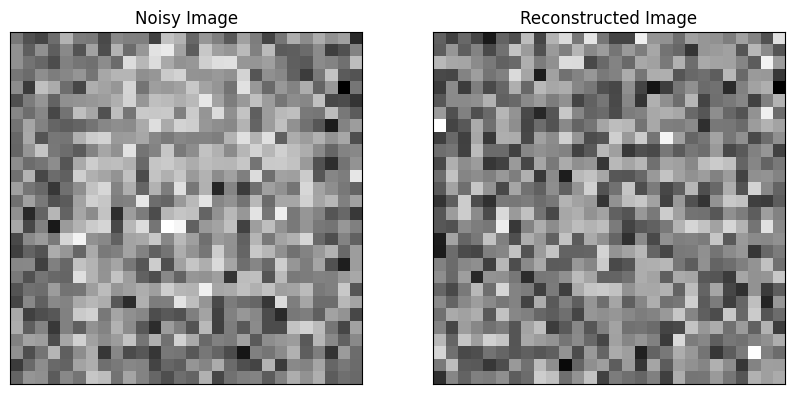

In [8]:
#3.Repeat the question 2 on the denoisening autoencoder

import matplotlib.pyplot as plt

# Get the reconstructed images for the test set
reconstructed_imgs = autoencoder.predict(x_test_noisy)

# Choose a random image from the test set
n = 10  # index of the image to be plotted
plt.figure(figsize=(10, 5))

# Plot the original noisy image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Noisy Image")

# Plot the reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(reconstructed_imgs[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()

1. Used the trained denoising autoencoder model to predict the reconstructed images from the noisy test data (x_test_noisy) and selected the index as 10.

2. Used Matplotlib to display the noisy test image.

3. Displayed the corresponding reconstructed (denoised) image predicted by the autoencoder, reshaping it to 28x28 pixels.


4. Display both images (noisy and reconstructed) side by side in a 1x2 grid layout.

5. Rendered the visualization using plt.show().

Epoch 1/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6947 - accuracy: 9.1667e-04 - val_loss: 0.6946 - val_accuracy: 0.0016
Epoch 2/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6944 - accuracy: 9.3333e-04 - val_loss: 0.6944 - val_accuracy: 0.0017
Epoch 3/10
235/235 [==============================] - 3s 15ms/step - loss: 0.6942 - accuracy: 9.3333e-04 - val_loss: 0.6941 - val_accuracy: 0.0018
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6940 - accuracy: 9.8333e-04 - val_loss: 0.6939 - val_accuracy: 0.0018
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6938 - accuracy: 9.8333e-04 - val_loss: 0.6937 - val_accuracy: 0.0019
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6936 - accuracy: 0.0010 - val_loss: 0.6935 - val_accuracy: 0.0019
Epoch 7/10
235/235 [==============================] - 4s 16ms/step - loss: 0.6934 - accuracy: 9.8333e-04 - val_loss: 0.693

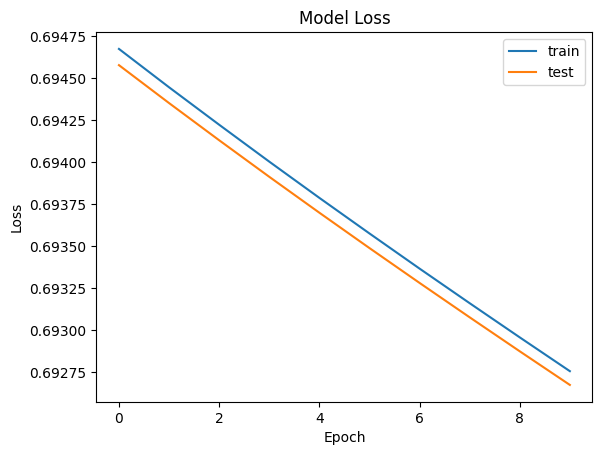

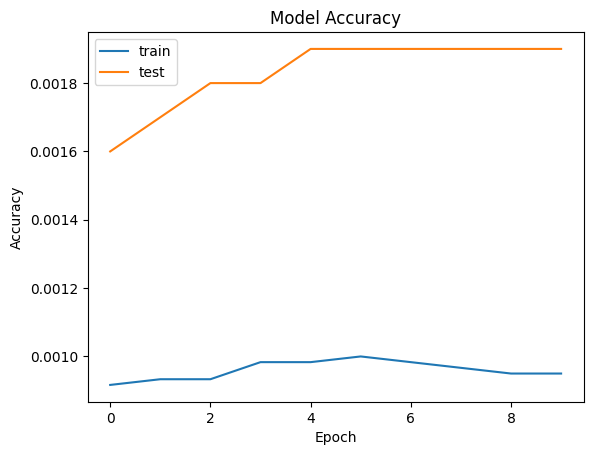

In [ ]:
#4.plot loss and accuracy using the history object

import matplotlib.pyplot as plt

# Train the autoencoder
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

# Plot the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()



1. Used the fit() method to train the autoencoder.

2. Accessed history.history['loss'] for training loss and history.history['val_loss'] for validation loss.

3. Plotted the loss against the epochs using Matplotlib and the accuracy.

4. Used plt.show() to render both the loss and accuracy plots.

